## Analysis of a survey about Star Wars movies
-The data wwas gathered by the team 538
-the question is " does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"
- 835 data points download form their github

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline

In [2]:
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [3]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

###### Removing rows with the RespondentID = NaN

In [4]:
star_wars=star_wars[star_wars['RespondentID'].notnull()]

In [5]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


'###### with the pd.series.map(), we turn the yes no response to a boolean columns.

In [6]:
#turn Have you seen any of the 6 films in the Star Wars franchise? to a Boolean type
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
#first column contains the list of the films
star_wars[star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=='Response']

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)


In [8]:
yes_no={"Yes":True, "No":False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

In [9]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

###### Same with the column 'Do you consider yourself to be a fan of the Star Wars film franchise?'

In [10]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [11]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

###### Converting the films columsn to bool with mapping technique

In [12]:
#generation of the dictionnary for the mapping
dict_films={}
for col in star_wars.columns[3:9]: #all the movies 
    print(star_wars[col].unique()) #to show 
    title=star_wars[col].unique()[0] #isolated the title
    dict_films[title] = True #automatically append to our dictonary for mapping
#last entry for the dictonnary when people did not see the movie
dict_films[np.NaN]=False

['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]


In [13]:
#mapping 
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(dict_films) 

In [14]:
#checking
for col in star_wars.columns[3:9]:
    print(star_wars[col].unique())
    print(star_wars[col].value_counts())

[ True False]
True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
[ True False]
False    615
True     571
Name: Unnamed: 4, dtype: int64
[ True False]
False    636
True     550
Name: Unnamed: 5, dtype: int64
[ True False]
True     607
False    579
Name: Unnamed: 6, dtype: int64
[ True False]
True     758
False    428
Name: Unnamed: 7, dtype: int64
[ True False]
True     738
False    448
Name: Unnamed: 8, dtype: int64


In [15]:
#rename of the titles columns
titles=[]
for title in star_wars.columns[3:9]:
    titles.append(title)

In [16]:
rename_titles={}
i=1
for col in titles:
    rename_titles[col]='seen_{0}'.format(i)
    i+=1

In [17]:
rename_titles

{'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6',
 'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1'}

In [18]:
#renaming the titles

star_wars = star_wars.rename(columns=rename_titles)

In [19]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


###### Cleaning ranking movies columns

In [20]:
for col in  star_wars[star_wars.columns[9:15]]:
    print(star_wars[col].value_counts())

4    237
6    168
3    130
1    129
5    100
2     71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64
5    300
4    183
2    116
3    103
6    102
1     32
Name: Unnamed: 10, dtype: int64
6    217
5    203
4    182
3    150
2     47
1     36
Name: Unnamed: 11, dtype: int64
1    204
6    161
2    135
4    130
3    127
5     79
Name: Unnamed: 12, dtype: int64
1    289
2    235
5    118
3    106
4     47
6     41
Name: Unnamed: 13, dtype: int64
2    232
3    220
1    146
6    145
4     57
5     36
Name: Unnamed: 14, dtype: int64


In [21]:
#change string to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [22]:
#dictonnary for renaming the ranking columns
ranking_rename={}
i=1
for col in star_wars.columns[9:15]:
    ranking_rename[col]='ranking_{0}'.format(i) 
    i+=1

In [23]:
ranking_rename

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
 'Unnamed: 10': 'ranking_2',
 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4',
 'Unnamed: 13': 'ranking_5',
 'Unnamed: 14': 'ranking_6'}

In [24]:
#renaming the ranking columns
star_wars = star_wars.rename(columns=ranking_rename)

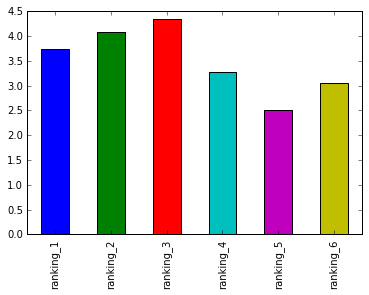

In [28]:
#finding the most favorite movie, the one with the least average score
score_movies=star_wars[star_wars.columns[9:15]].mean()
score_movies.plot.bar()

- the most favorite movie is the 5th 
- The persones suveyd prefered the original movies over the newest ones, 
- what could be the cause?
    - dispointement
    - the actors
    - the productors
    - What is the age of the person questionned? it might matter.

###### Number of views for each movies

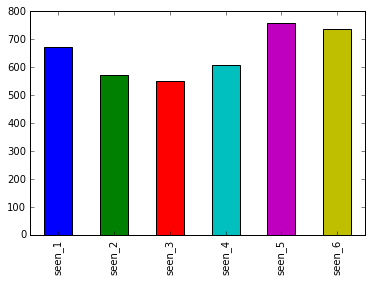

In [167]:
view_movies=star_wars[star_wars.columns[3:9]].sum()
view_movies.plot.bar()

In [41]:
import matplotlib.pyplot as plt

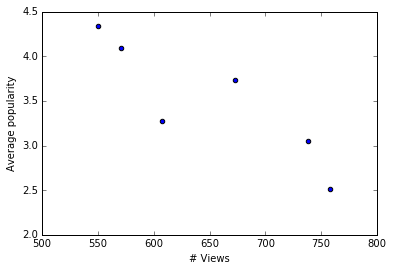

In [99]:
plt.scatter(view_movies,score_movies)
plt.xlabel('# Views')
plt.ylabel('Average popularity')

- Based on the scatter plot there is correlation between the numbers of view and the average score, if more views then the popularity of the movie is higher (meaning a lower score)
- But, no everybody have seen all the movies so the data are biased! how someone oh did see a movie can rank it? There are always more ranking responses that number of views
- There are always ~350 missing values in the  ranking columns why?

In [102]:
#NaN values in ranking
for i in range(1,7):
    print(star_wars['ranking_{0}'.format(i)].isnull().sum())
#star_wars[star_wars.columns[3:15]].info()

351
350
351
350
350
350


In [82]:
#number of poeple who has seen the movies
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

######  Gender analysis

In [103]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

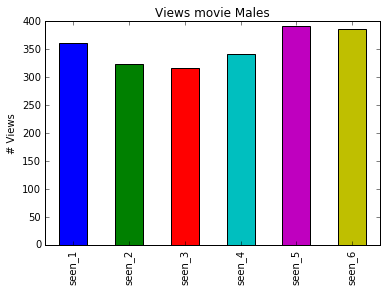

In [139]:
#most viewed movie
plt.figure()
males[males.columns[3:9]].sum().plot.bar(title='Views movie Males')
plt.ylabel("# Views")

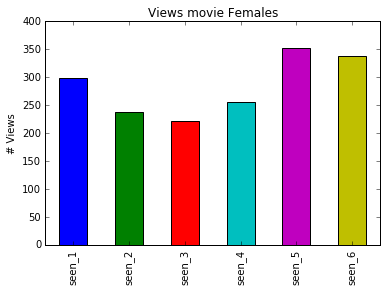

In [132]:
#views movies females
plt.figure()
females[females.columns[3:9]].sum().plot.bar(title='Views movie Females')
plt.ylabel("# Views")

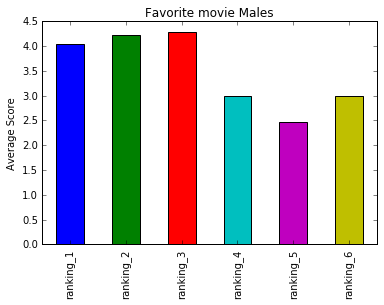

In [138]:
#favorite movies male
plt.figure()
males[males.columns[9:15]].mean().plot.bar(title='Favorite movie Males')
plt.ylabel("Average Score")

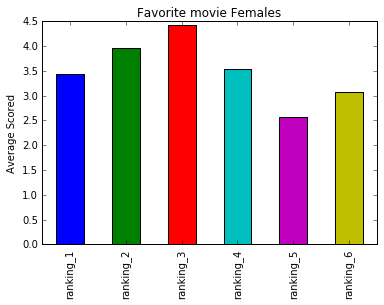

In [141]:
#favorite movie females
plt.figure()
females[females.columns[9:15]].mean().plot.bar(title='Favorite movie Females')
plt.ylabel('Average Scored')

- the score are more marked with the female genders 
- the correlation between the number of view and is greater than with the male gender 

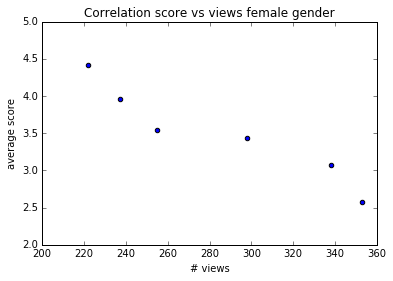

In [151]:
plt.scatter(females[females.columns[3:9]].sum(),females[females.columns[9:15]].mean())
plt.xlabel('# views')
plt.ylabel('average score')
plt.title('Correlation score vs views female gender')

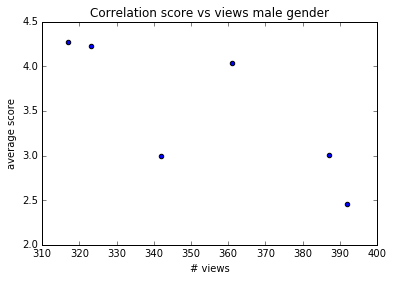

In [150]:
plt.scatter(males[males.columns[3:9]].sum(),males[males.columns[9:15]].mean())
plt.xlabel('# views')
plt.ylabel('average score')
plt.title('Correlation score vs views male gender')

###### Splitting the data fan franchise Star Wars

In [178]:
fan_SW = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']
                    ==True]
no_fan_SW = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']
                    ==False]

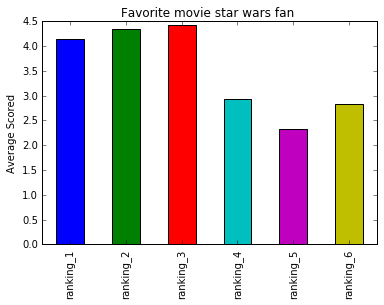

In [179]:
#favorite movie fan star wars
plt.figure()
fan_SW[fan_SW.columns[9:15]].mean().plot.bar(title='Favorite movie star wars fan ')
plt.ylabel('Average Scored')

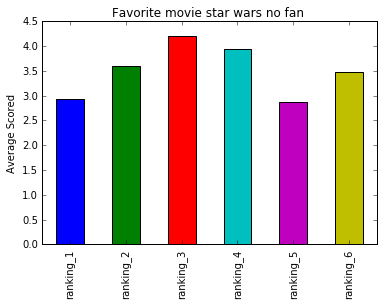

In [177]:
#favorite movie no fan star wars
plt.figure()
no_fan_SW[no_fan_SW.columns[9:15]].mean().plot.bar(title='Favorite movie star wars no fan ')
plt.ylabel('Average Scored')

###### Splitting data if fan Star Trek

In [ ]:
fan_star_trek = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']
                          == True]
no_fan_star_trek = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']
                          == False]